In [41]:

import featureExtraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataprocessor

In [30]:
dfvg = pd.read_parquet(r'C:\Users\diwah\Desktop\mfc\anomaly-detection-using-Graph\new.praquet')

In [34]:
CD = dfvg[dfvg["Class"] == 'CD']
NORM = dfvg[dfvg["Class"] == 'NORM']
MI = dfvg[dfvg["Class"] == 'MI']
HYP = dfvg[dfvg["Class"] == 'HYP']
STTC = dfvg[dfvg["Class"] == 'STTC']
lis = [CD,NORM,MI,HYP,STTC]

In [76]:
feat = dfvg.columns

In [42]:
dataset = r'..\dataset\data'
preprocessing = dataprocessor.dataPreprocessing()
data = preprocessing.load_saved_sampled_super_class(r'..\dataset\preprocessed\subset_full')

Data loading complete.


In [59]:
X = dfvg[dfvg.columns[1:]]
Y = dfvg["Class"]

In [52]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importance = mutual_info_classif(dfvg[dfvg.columns[1:]],dfvg["Class"])

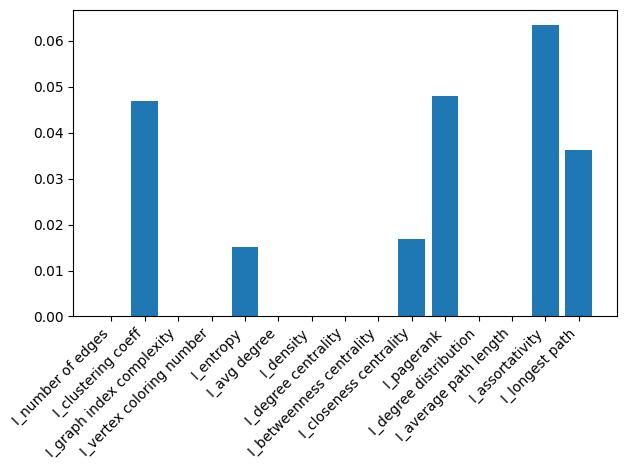

In [58]:
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and importance is your list of heights
plt.bar(dfvg.columns[1:], height=importance)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn. feature_selection import chi2

# Convert to categorical data by converting data to integers
X_cat = X.astype(int)

# Three features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)

# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features. shape[1])
print(X_kbest_features)

Original feature number: 15
Reduced feature number: 10
[[2902   11    4 ...    4    0    9]
 [3641   13    4 ...    3    0    8]
 [3155   13    4 ...    3    0    8]
 ...
 [5293   18    5 ...    2    0    7]
 [4852   12    4 ...    3    0    8]
 [3611   14    4 ...    2    0    6]]


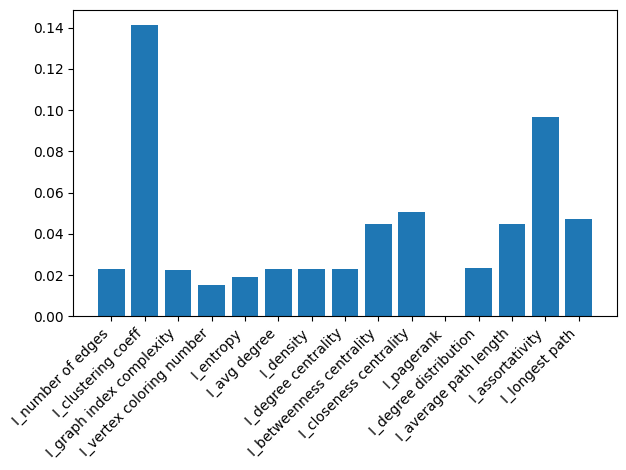

In [65]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ranks = fisher_score.fisher_score(np.array(X), np.array(Y))

# Plotting the ranks
# Assuming dfvg is your DataFrame and importance is your list of heights
plt.bar(dfvg.columns[1:], height=ranks)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [69]:
from sklearn import preprocessing
encoding = preprocessing.LabelEncoder()
new = encoding.fit_transform(Y)

In [71]:
dfvg["Class"] = new

In [72]:
dfvg.corr()

,Class,I_number of edges,I_clustering coeff,I_graph index complexity,I_vertex coloring number,I_entropy,I_avg degree,I_density,I_degree centrality,I_betweenness centrality,I_closeness centrality,I_pagerank,I_degree distribution,I_average path length,I_assortativity,I_longest path
Class,1.000000,-0.065284,0.120228,-0.044856,-0.046327,-0.036684,-0.065284,-0.065284,-0.065284,-0.026009,0.021725,-0.608017,-0.055144,-0.026009,-0.005617,0.001066
I_number of edges,-0.065284,1.000000,0.036433,0.868905,0.832007,0.906052,1.000000,1.000000,1.000000,-0.501703,0.515156,-0.070862,-0.521938,-0.501703,-0.534767,-0.311746
I_clustering coeff,0.120228,0.036433,1.000000,0.038103,0.123712,-0.175366,0.036433,0.036433,0.036433,-0.361943,0.329761,-0.133963,-0.269819,-0.361943,-0.430770,-0.308354
I_graph index complexity,-0.044856,0.868905,0.038103,1.000000,0.797073,0.836491,0.868905,0.868905,0.868905,-0.686239,0.716461,-0.090113,-0.760810,-0.686239,-0.568753,-0.375637
I_vertex coloring number,-0.046327,0.832007,0.123712,0.797073,1.000000,0.815475,0.832007,0.832007,0.832007,-0.484154,0.490194,-0.064470,-0.512732,-0.484154,-0.413534,-0.294580
I_entropy,-0.036684,0.906052,-0.175366,0.836491,0.815475,1.000000,0.906052,0.906052,0.906052,-0.414567,0.423688,-0.059371,-0.504363,-0.414567,-0.406641,-0.203453
I_avg degree,-0.065284,1.000000,0.036433,0.868905,0.832007,0.906052,1.000000,1.000000,1.000000,-0.501703,0.515156,-0.070862,-0.521938,-0.501703,-0.534767,-0.311746
I_density,-0.065284,1.000000,0.036433,0.868905,0.832007,0.906052,1.000000,1.000000,1.000000,-0.501703,0.515156,-0.070862,-0.521938,-0.501703,-0.534767,-0.311746
I_degree centrality,-0.065284,1.000000,0.036433,0.868905,0.832007,0.906052,1.000000,1.000000,1.000000,-0.501703,0.515156,-0.070862,-0.521938,-0.501703,-0.534767,-0.311746
I_betweenness centrality,-0.026009,-0.501703,-0.361943,-0.686239,-0.484154,-0.414567,-0.501703,-0.501703,-0.501703,1.000000,-0.988879,0.132500,0.825641,1.000000,0.593760,0.718013


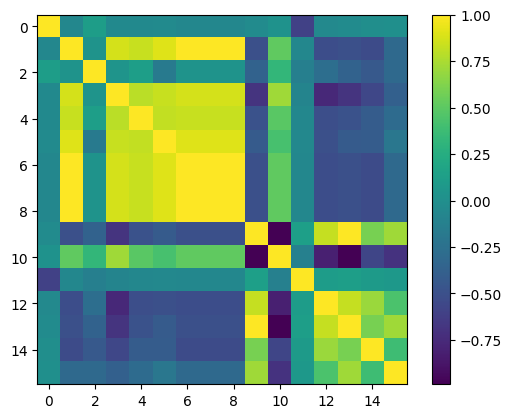

In [74]:
plt.imshow(dfvg.corr())
plt.colorbar()

<Axes: >

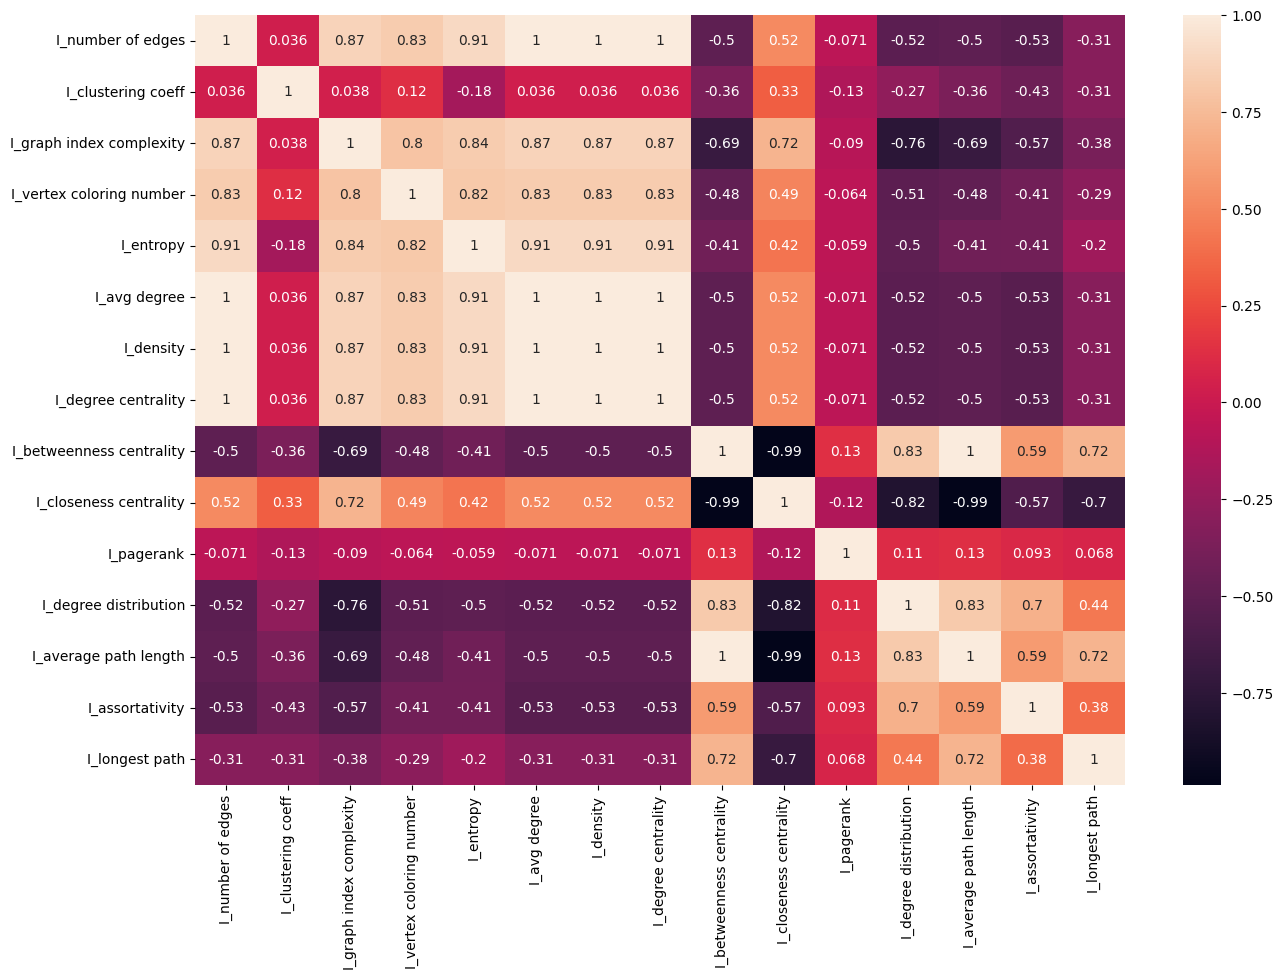

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = X.corr()

# PLotting Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot = True)

<Axes: xlabel='I_clustering coeff', ylabel='Density'>

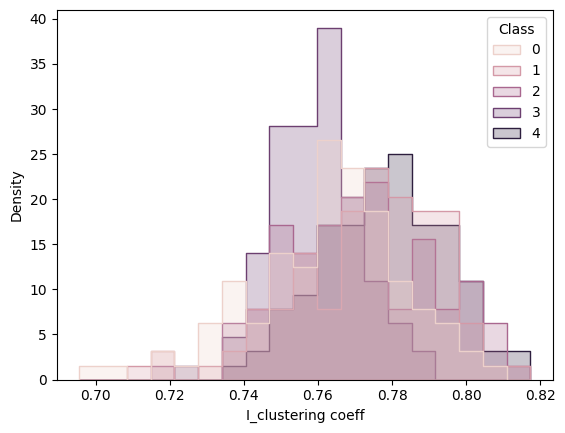

In [82]:
sns.histplot(data=dfvg, x="I_clustering coeff", hue="Class", element="step", stat="density", common_norm=False)

<Axes: xlabel='I_clustering coeff', ylabel='I_assortativity'>

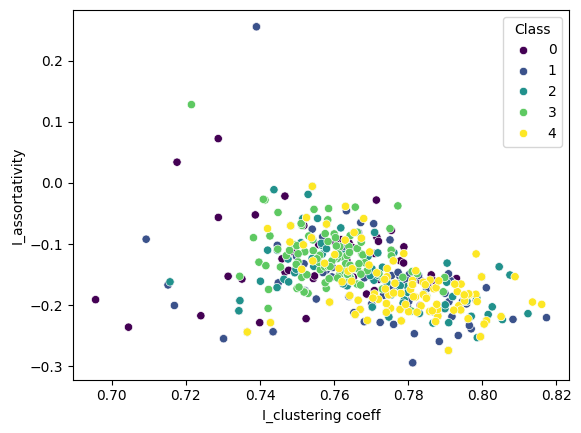

In [86]:
sns.scatterplot(data=dfvg, x="I_clustering coeff", y="I_assortativity", hue="Class", palette="viridis")

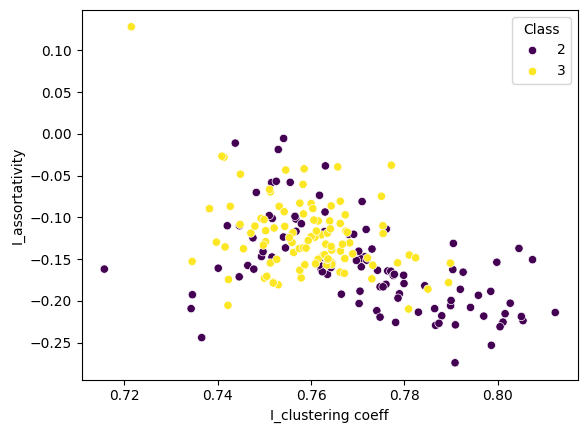

In [93]:
import pandas as pd

# Assuming dfvg is your DataFrame
# Filter the DataFrame to include only rows where the "Class" column is 0 or 1
filtered_df = dfvg[dfvg['Class'].isin([3, 2])]

# Create the scatter plot with the filtered data
sns.scatterplot(data=filtered_df, x="I_clustering coeff", y="I_assortativity", hue="Class", palette="viridis")

# Show the plot
plt.show()


In [92]:
print(Y[299])

MI


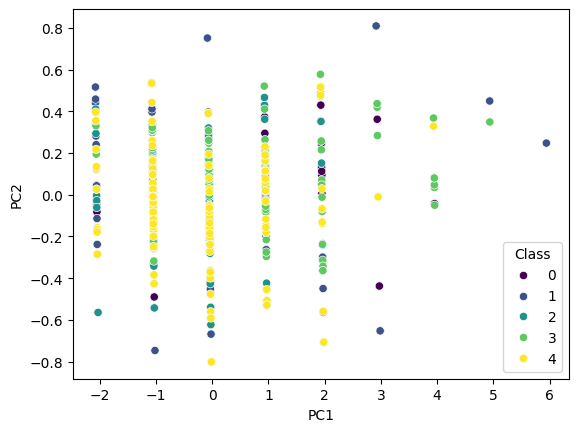

In [94]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and feat is your list of features
# Selecting the desired features
selected_features = [feat[2], feat[5], feat[10], feat[11], feat[14], feat[15]]
class_column = feat[0]

# Creating a new DataFrame with the selected features and class column
newframe = dfvg[[class_column] + selected_features]

# Separating the features for PCA and the class labels
X = newframe[selected_features]
y = newframe[class_column]

# Performing PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Creating a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df[class_column] = y.values

# Creating the scatter plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=class_column, palette='viridis')

# Show the plot
plt.show()


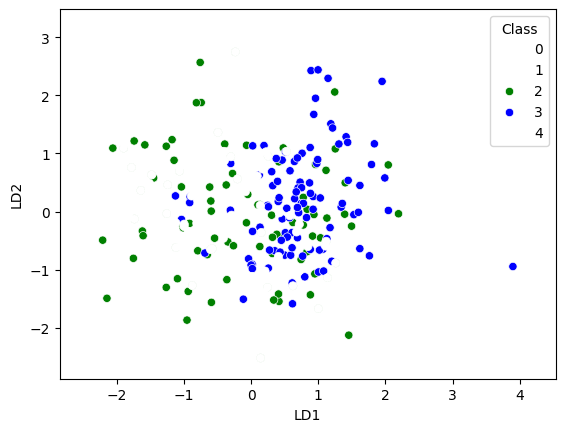

In [99]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and feat is your list of features
# Selecting the desired features
selected_features = [feat[2], feat[5], feat[10], feat[11], feat[14], feat[15]]
class_column = feat[0]

# Creating a new DataFrame with the selected features and class column
newframe = dfvg[[class_column] + selected_features]

# Separating the features for LDA and the class labels
X = newframe[selected_features]
y = newframe[class_column]

# Performing LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(X, y)

# Creating a new DataFrame for the LDA results
lda_df = pd.DataFrame(data=lda_components, columns=['LD1', 'LD2'])
lda_df[class_column] = y.values

# Creating the scatter plot
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=class_column, palette=['blue',"orange","green","blue","white"])

# Show the plot
plt.show()


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).